#### GA Insert Analysis

This code varies the masked section of pLac to see how it relates to the upper and lower bounds of the promoter's expression.

In [1]:
import numpy as np
import random

from GA.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [2]:
# pLac parameters
pLac_up = 'AATACTAGAGGTCTTCCGAC'
pLac_change = 'TTTACACTTTATGCTTCCGGCTCGTATGTT'
pLac_down = 'GTGTGGGCGGGAAGACAACTAGGGG'

# Genetic Algorithm parameters
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
}
target_expressions = [0, 1]
lineages = 3

# Set seed
seed = 0
random.seed(seed)

# Generate random masks
test_cases = 10
mask_counts = np.linspace(1, len(pLac_change), test_cases, dtype=int)

In [3]:
def replace_sequence(seq, n):
    indices_to_replace = random.sample(range(len(seq)), n)
    return ''.join([seq[i] if i not in indices_to_replace else 'N' for i in range(len(seq))])

In [4]:
param_ranges = {
    'masked_sequence' : [pLac_up + replace_sequence(pLac_change, mask) + pLac_down for mask in mask_counts]
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs)
results_df['mask_length'] = results_df['masked_sequence'].str.count('N')

Processing combinations:   0%|          | 0/60 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


Processing combinations: 100%|██████████| 60/60 [01:34<00:00,  1.57s/it, Elapsed=1.57min, ETA=0.00s] 


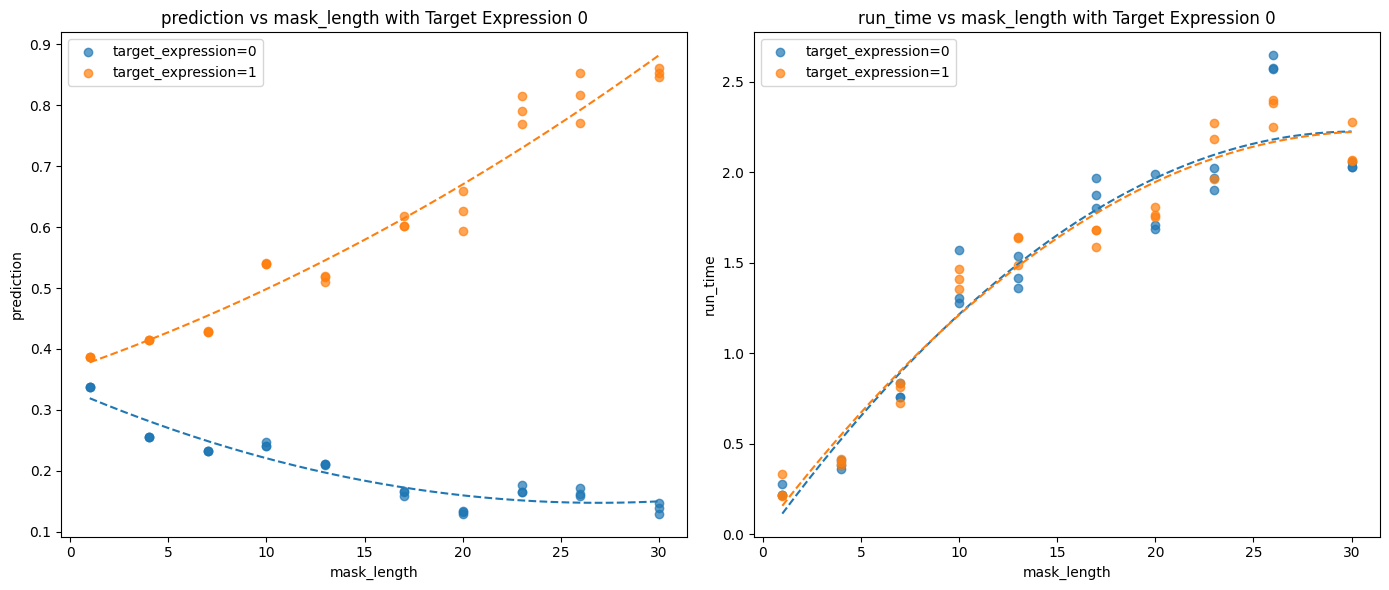

<Figure size 640x480 with 0 Axes>

In [6]:
scatter_plot_overlaid(results_df, 0, 'mask_length', 'target_expression', metric1='prediction', polynomial_degree=2)